# Trabajo practico II - Visión por computadora I



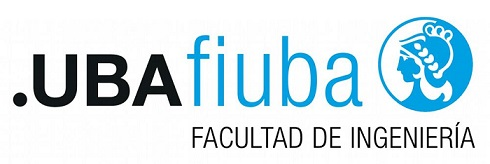

El objetivo de este trabajo práctico es aplicar los concpetos vistos en la clase 3 de la materia visión por computadora I de la Especialización en IA de la FIUBA

El trabajo práctico consta de 2 partes con varios objetivos e incisos cada uno.
Primero cargaremos las libreriás necesarias para trabajar y luego se detalla cada parte y punto a analizar y trabajar, junto a sus conclusiones

## Cargamos las librerias necesarias

In [55]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

## Parte 1:  

#### 1.0 Implementar la función create_gauss_filter para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

#### 1.1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

#### 1.2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel

--------------------------------------------------------------------------------------

#### 1.0  Generamos la función de filtro gaussiano

In [56]:
def create_gauss_filter(height:int, width:int, k_size:int, sigma:float) -> (np.ndarray,np.ndarray): 
    canvas = np.zeros((height, width))
    canvas[int(height/2),int(width/2)] = 1
    filtro = cv.GaussianBlur(canvas, (k_size, k_size), sigma)
    filtro_tf = np.fft.fft2(filtro)
    return filtro,filtro_tf

#### 1.1  Aplicamos la función de filtro gaussiano con distintos parametros y graficamos

##### Generamos funcion para graficar los filtros

In [57]:
def graficar_filtros(filtro:np.ndarray, filtro_tf:np.ndarray):
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("Kernel Gausiano")
    plt.imshow(filtro, cmap='jet')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("FFT del kernel")
    plt.imshow(np.abs(np.fft.ifftshift(filtro_tf)), cmap='jet')

##### Cargamos una imagen de ejemplo para graficar y probar los filtros

In [58]:
img_chew = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
print("Tamaño de imagen: ", img_chew.shape)

Tamaño de imagen:  (756, 1200)


##### Prueba de kernel 1

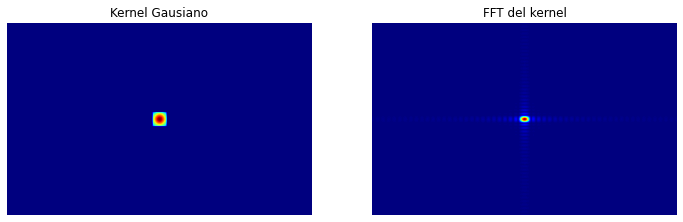

In [59]:
height = img_chew.shape[0]
width = img_chew.shape[1]
kern_size = 55
sigma = 22.5

filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)
graficar_filtros(filtro,filtro_tf)

##### Prueba de kernel 2

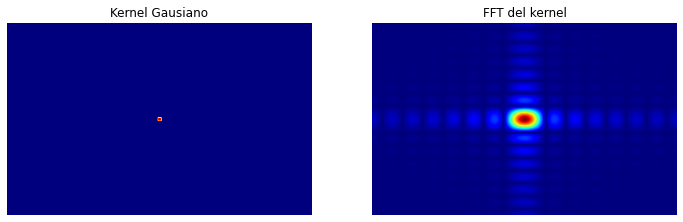

In [60]:
kern_size = 15
sigma = 10.5

filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)
graficar_filtros(filtro,filtro_tf)

##### Prueba de kernel 3

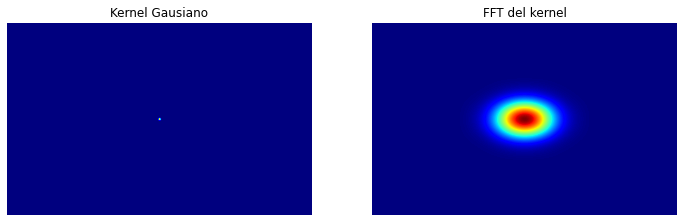

In [61]:
kern_size = 15
sigma = 2.5

filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)
graficar_filtros(filtro,filtro_tf)

##### Prueba de kernel 4

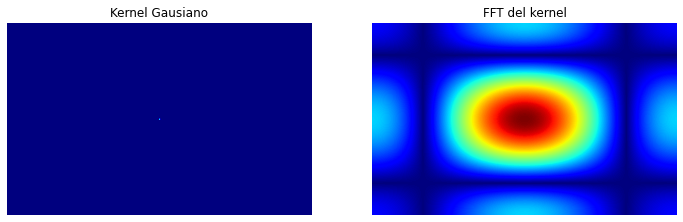

In [62]:
kern_size = 3
sigma = 22.5

filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)
graficar_filtros(filtro,filtro_tf)

#### Aplicamos el kernel a la imagen y vemos los resultados

##### Primero mostramos la imagen original

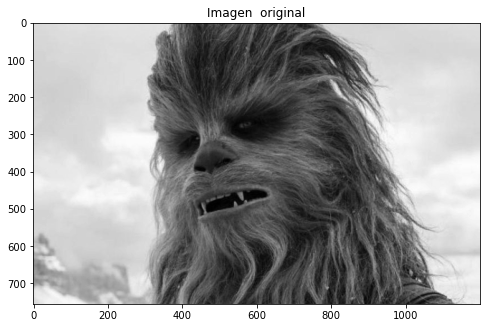

In [63]:
plt.figure(1,figsize=(8,8))
plt.imshow(img_chew,cmap='gray')
plt.title('Imagen  original')
plt.show()

##### Armo una funcion para aplicar el filtro y graficar segun parametros

In [64]:
def filtra_y_grafica(kern_size:int,gima:int):
    filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)

    # Convieto la imagen al dominio de Fourier y aplico el producto con el filtro_tf
    img_fft = np.fft.fft2(img_chew)
    img_filtrada_fourier = img_fft * filtro_tf

    # Convierto la imagen nuevamente al dominio original para graficar y comparar
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(img_filtrada_fourier)))

    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("Imagen  original")
    plt.imshow(img_chew, cmap='gray')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("Desenfoque gausiano")
    plt.imshow(img_gauss, cmap='gray')    

##### Aplicamos filtrado y vemos resultados con diferentes parametros

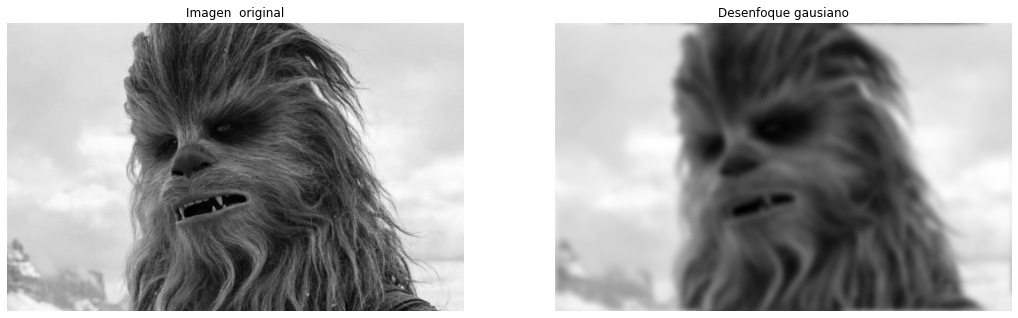

In [65]:
# Genermos los filtros con los parametros 
kern_size = 55
sigma = 7.5

filtra_y_grafica(kern_size,sigma)

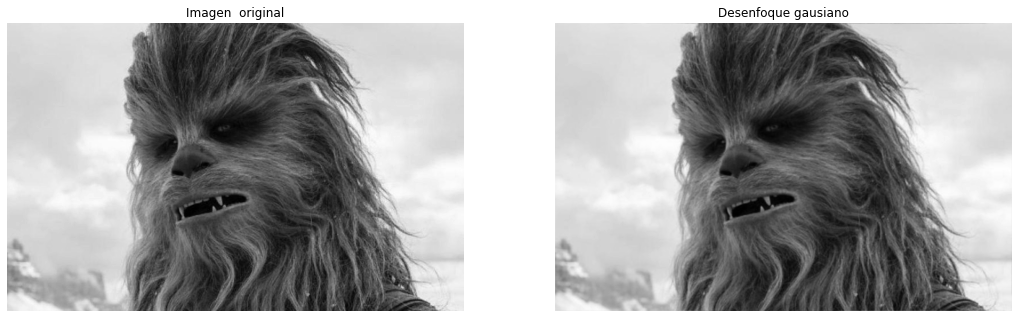

In [66]:
kern_size = 3
sigma = 22.5
filtra_y_grafica(kern_size,sigma)

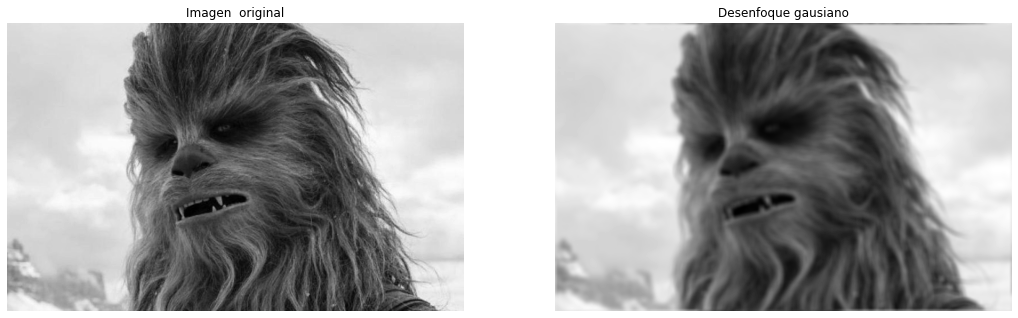

In [67]:
kern_size = 15
sigma = 10.5
filtra_y_grafica(kern_size,sigma)

#### 1.2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel

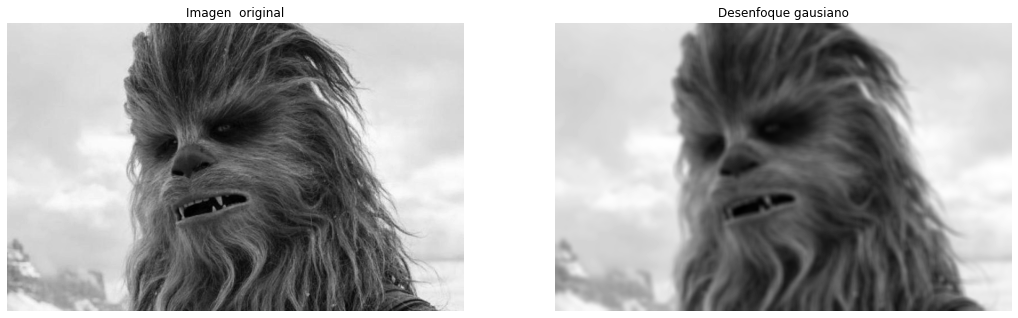

In [68]:
kern_size = 15
sigma = 10.5
#kern_size = 3
#sigma = 22.5
filtro,filtro_tf = create_gauss_filter(height,width,kern_size,sigma)

img_convolucionada = cv.filter2D(img_chew,-1,filtro)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Imagen  original")
plt.imshow(img_chew, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Desenfoque gausiano")
plt.imshow(img_convolucionada, cmap='gray')    


#### Conclusiones

Al aplicar la convolucion con el filtro guassiano vemos que, como era de esperarse, se obtiene el mismo resultado que llevar la imagen al dominio espectral y hacer el producto de la imagen convertida por su filtro en dominio espectral.

Se probaron con diferentes parámetros para los filtros y se vio como afecta el suavizado de la imagen resultante

## Parte 2:  

Para la imagen suministrada “metal grid ”. Implementar un algoritmo

#### 2.1 Calcule los gradientes en la imagen (dirección y módulo)
#### 2.2 Muestre imágenes de ángulo y módulo
#### 2.3 Marque con colores las direcciones de gradientes más representativos.


------------------------------------------------------------------------------------

##### Cargamos la imagen y la mostramos

Tamaño de imagen:  (350, 735, 3) 



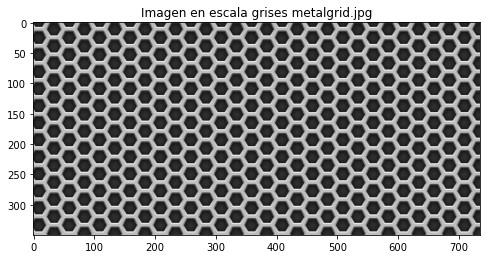

In [69]:
img_path = 'metalgrid.jpg'

img = cv.imread(img_path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print("Tamaño de imagen: ", img.shape,"\n")

plt.figure(1,figsize=(8,8))
plt.imshow(img_gray,cmap='gray')
plt.title('Imagen en escala grises '+img_path)
plt.show()

#### Aplicamos suavizado gaussiano

In [70]:
def pasaje_a_cromaticas(image_in:np.ndarray) -> np.ndarray: 
    image = np.float32(image_in).copy()
    '''
    Objetivo: esta funcion realiza el pasaje de una imagen a coordenadas cromáticas
    Para el caso del denominador = 0 se asigna al pixel un valor de 0 en la imagen convertida
    ---------------------------------------
    Argumentos
    image_in: Imagen de entrada
    ---------------------------------------
    Retorno
    image: (numpy.ndarray) con la imagen pasada a coordenadas cromáticas
    '''
    c1 = np.float16(image[:,:,0])
    c2 = np.float16(image[:,:,1])
    c3 = np.float16(image[:,:,2])
    suma = c1 + c2 + c3
    mascara = suma==0
    
    c1 = np.uint8(255*c1 / suma)
    c2 = np.uint8(255*c2 / suma)
    c3 = np.uint8(255*c3 / suma)
    c1[mascara]=0
    c2[mascara]=0
    c3[mascara]=0
    
    image = cv.merge((c1,c2,c3))

    return image

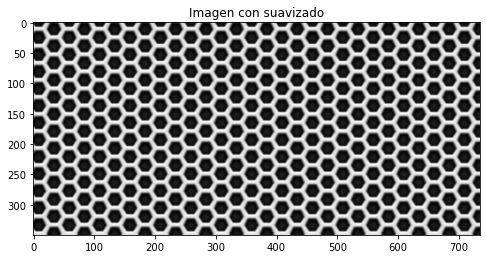

In [71]:
blur = cv.GaussianBlur(img_gray,(5,5),0)

plt.figure(1,figsize=(8,8))
plt.imshow(blur,cmap='gray')
plt.title('Imagen con suavizado')
plt.show()

#### Aplicamos Sobel

In [72]:
#Sobelx
#Usamos CV?64F para evitar el problema transicion blanco a negro que quedan negativas, como indica OpenCV en su documnetacion en
#https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html
sobelx_64 = cv.Sobel(blur,cv.CV_64F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

#Sobely
sobely_64 = cv.Sobel(blur,cv.CV_64F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)


#### 2.1 calculamos los gradientes

In [73]:
# Calculamos magnitud de los gradientes
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
magnitudes = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angulos = np.rad2deg(theta)

#### 2.2.1 Vemos las magnitudes calculadas

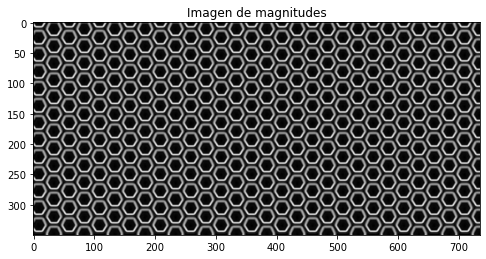

In [74]:
plt.figure(1,figsize=(8,8))
plt.imshow(magnitudes,cmap='gray')
plt.title('Imagen de magnitudes')
plt.show()

In [75]:
print("Magnitud mínima: ",np.min(magnitudes))
print("Magnitud máxima: ",np.max(magnitudes))
print("Vector de magnitudes: \n",magnitudes)

Magnitud mínima:  0
Magnitud máxima:  255
Vector de magnitudes: 
 [[  0   8   0 ...   0   0   0]
 [ 54  47  22 ...  51  51  51]
 [104 107  71 ...  55  55  55]
 ...
 [  2   6  12 ...   4   3   2]
 [  1   1   2 ...   4   3   1]
 [  0   0   0 ...   3   2   0]]


#### 2.2.2 Vemos las angulos calculados

In [76]:
print("Angulo mínimo: ",np.min(angulos))
print("Angulo máximo: ",np.max(angulos))
print("Vector de angulos: \n",angulos)

Angulo mínimo:  -179.63035493815298
Angulo máximo:  180.0
Vector de angulos: 
 [[  0.         180.         180.         ...   0.         180.
    0.        ]
 [ 90.         115.94229549 130.60129465 ... -89.38394009 -91.84761027
  -90.        ]
 [ 90.         123.25001643 140.78239232 ... -88.85423716 -92.29061004
  -90.        ]
 ...
 [-90.         -68.19859051 -68.19859051 ...  45.          56.30993247
   90.        ]
 [-90.         -90.         -78.69006753 ...  33.69006753  45.
   90.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


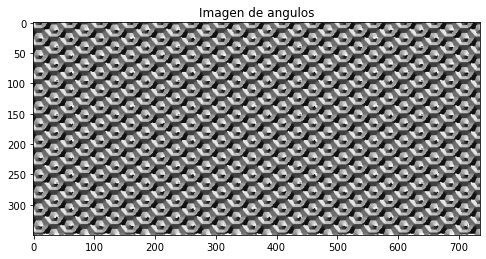

In [77]:
angulos_nrom = angulos + 180
angulos_nrom = angulos_nrom/angulos_nrom.max()*255
plt.figure(1,figsize=(8,8))
plt.imshow(angulos_nrom,cmap='gray')
plt.title('Imagen de angulos')
plt.show()

#### 2.3 Marcamos con colores las direcciones de gradientes más representativos.

##### Generamos una mascara para ciertos angulos y vemos la imagen

<Figure size 432x288 with 0 Axes>

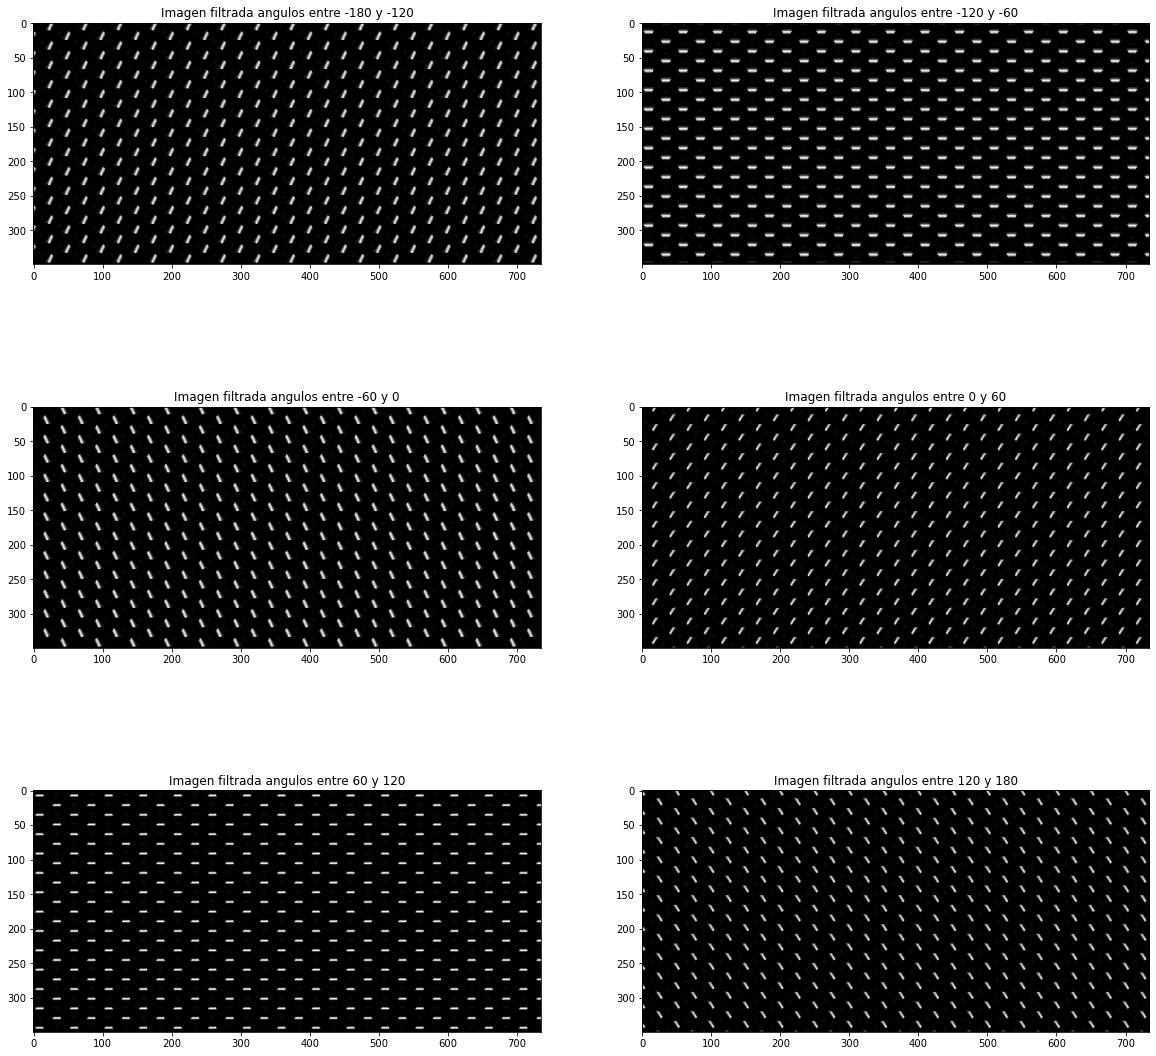

In [78]:
ang_min = -180
plt.figure()
fig, arr = plt.subplots(3,2,figsize=(20,20))
arr = arr.flatten()
    
for i in range(6):
    ang_max = 60 + ang_min
    img_sal = np.where(np.logical_and(angulos > ang_min, angulos < ang_max),magnitudes, 0)
    arr[i].imshow(img_sal,cmap='gray')
    arr[i].set_title('Imagen filtrada angulos entre {0} y {1}'.format(str(ang_min),str(ang_max)))
    ang_min = ang_max

plt.show()

##### Armamos vectores para cada color y generamos una imagen compuesta

In [79]:
# Generamos 3 canales inicializados en 0
H, W = mag.shape
canal_r = np.zeros((H,W), dtype= np.uint8)
canal_g = np.zeros((H,W), dtype= np.uint8)
canal_b = np.zeros((H,W), dtype= np.uint8)

#Filtramos en cada máscara 2 grupos de ángulos opuestos
mascara_r1 = np.logical_and(angulos > -180, angulos < -120)
mascara_r2 = np.logical_and(angulos > 0, angulos < 60)
mascara_r = np.logical_or(mascara_r1, mascara_r2)  
canal_r = np.where(mascara_r,magnitudes, 0)

mascara_g1 = np.logical_and(angulos > -120, angulos < -60)
mascara_g2 = np.logical_and(angulos > 60, angulos < 120)
mascara_g = np.logical_or(mascara_g1, mascara_g2)  
canal_g = np.where(mascara_g,magnitudes, 0)

mascara_b1 = np.logical_and(angulos > -60, angulos < 0)
mascara_b2 = np.logical_and(angulos > 120, angulos < 180)
mascara_b = np.logical_or(mascara_b1, mascara_b2)  
canal_b = np.where(mascara_b,magnitudes, 0)

##### Hacemos una imagen compuesta con 3 colores

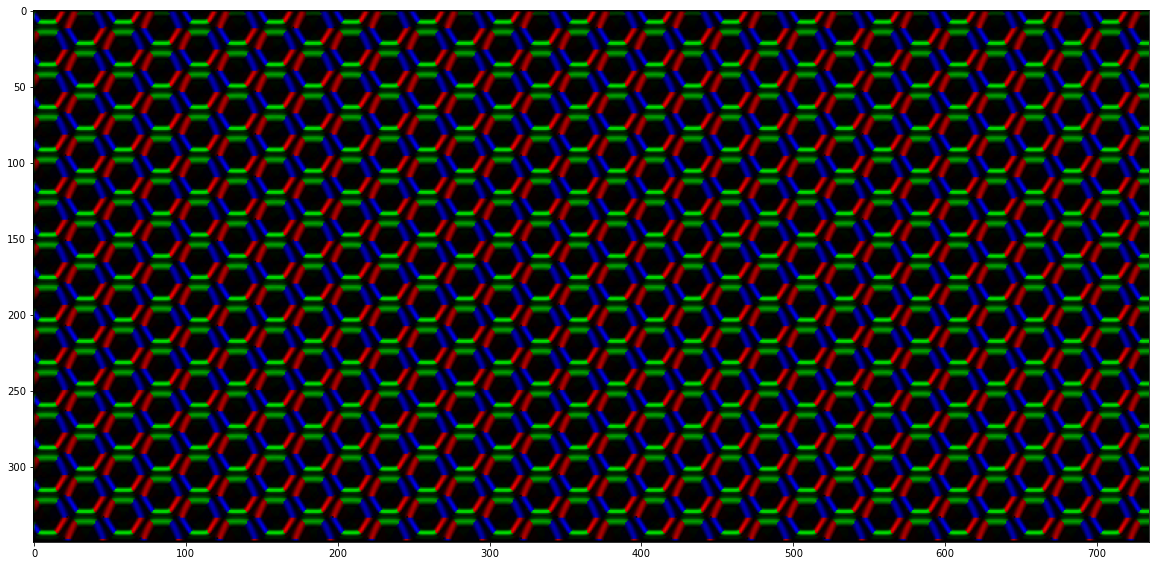

In [80]:
# Armamos una imagen con los 3 canales, de modo que los gradiente opuestos queden representados con el mismo color
imgRGB2 = cv.merge((canal_r, canal_g, canal_b))

plt.figure(figsize=(20,20))
plt.imshow(imgRGB2)
plt.show()

#### Generamos una imagen compuesta pero con 6 colores diferentes

In [81]:
# Generamos 3 canales inicializados en 0
H, W = mag.shape
canal_r = np.zeros((H,W), dtype= np.uint8)
canal_g = np.zeros((H,W), dtype= np.uint8)
canal_b = np.zeros((H,W), dtype= np.uint8)

#Filtramos en cada máscara 2 grupos de ángulos opuestos
mascara_r1 = np.logical_and(angulos > -180, angulos < -120)
mascara_r2 = np.logical_and(angulos > 0, angulos < 60)
mascara_r3 = np.logical_and(angulos > 120, angulos < 180)
mascara_r = np.logical_or(mascara_r1, mascara_r2)  
mascara_r = np.logical_or(mascara_r, mascara_r3)  
canal_r = np.where(mascara_r,magnitudes, 0)

mascara_g1 = np.logical_and(angulos > -120, angulos < -60)
mascara_g2 = np.logical_and(angulos > 60, angulos < 120)
mascara_g3 = np.logical_and(angulos > 0, angulos < 60)
mascara_g = np.logical_or(mascara_g1, mascara_g2)  
mascara_g = np.logical_or(mascara_g, mascara_g3)  
canal_g = np.where(mascara_g,magnitudes, 0)

mascara_b1 = np.logical_and(angulos > -60, angulos < 0)
mascara_b2 = np.logical_and(angulos > 120, angulos < 180)
mascara_b3 = np.logical_and(angulos > 60, angulos < 120)
mascara_b = np.logical_or(mascara_b1, mascara_b2)  
mascara_b = np.logical_or(mascara_b, mascara_b3)  
canal_b = np.where(mascara_b,magnitudes, 0)

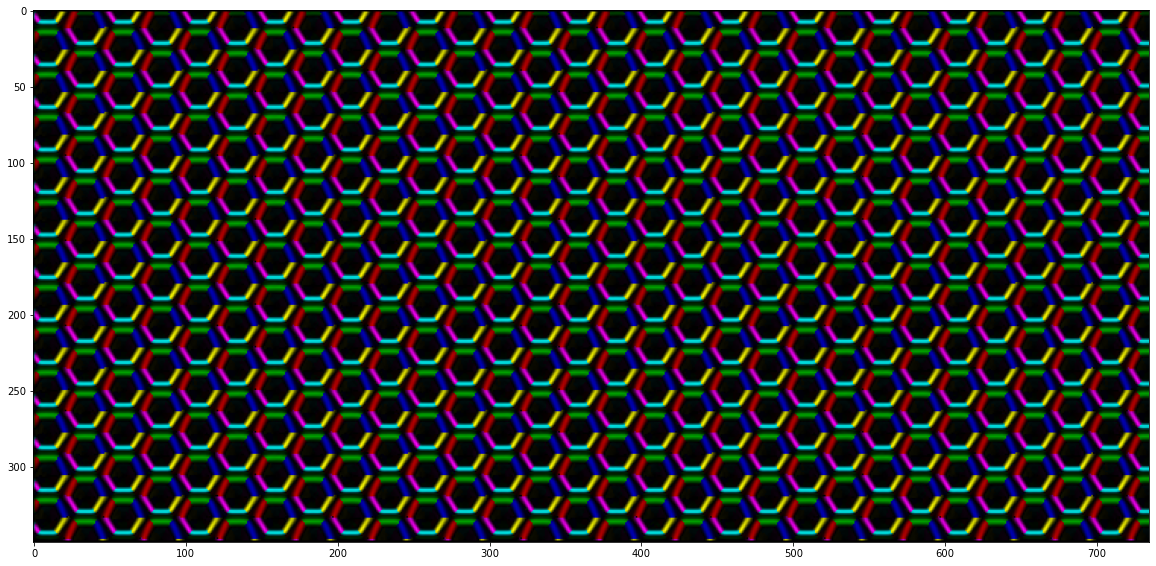

In [83]:
# Armamos una imagen con los 6 colores
imgRGB2 = cv.merge((canal_r, canal_g, canal_b))

plt.figure(figsize=(20,20))
plt.imshow(imgRGB2)
plt.show()

#### Conclusiones

En este segundo ejercicio pudimos calcular los gradientes de una imagen y analizar su magnitud y ángulos.

Con estos vectores de magnitud y ángulo pudimos hacer un filtrado y graficar cada uno en diferentes colores según el rango de ángulos. 

En función de las máscaras utilizadas pudimos graficar los 6 gradientes principales en 3 o 6 colores (diferentes filtros para cada canal RGB).